# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Zara Zannetta]
- **Email:** [zara.zannetta@gmail.com]
- **ID Dicoding:** [zarazannetta]


## Menentukan Pertanyaan Bisnis

- Kapan aktivitas bike-sharing tertinggi dan terendah dalam satu hari?
- Bagaimana musim dan cuaca mempengaruhi aktivitas bike-sharing dalam satu hari?
- Bagaimana perbedaan aktivitas bike-sharing user casual dan registered dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [82]:
pip install numpy pandas scipy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

## Data Wrangling

### Gathering Data

In [84]:
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [85]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Both days_df and hours_df have same parameters (except hours_df has hr). The difference between them is bike-sharing activity in days_df is counted on daily basis and bike-sharing activity in hours_df is counted on hourly basis. 
- The data that suitable for analysing bike-sharing activity in a day is hours_df, therefore this data analysis will use hours_df as the main data.

### Assessing Data

In [86]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [87]:
#Check missing value
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [88]:
#Check duplicate data
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [89]:
#Check inconsistent 'cnt' data
inconsistent_rows = hours_df[hours_df['cnt'] != (hours_df['casual'] + hours_df['registered'])]
print(inconsistent_rows)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [90]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Ada kesalahan tipe data pada data hours_df kolom dteday. Tipe data dteday seharusnya datetime.

### Cleaning Data

In [91]:
#Changing data type in hours_df
datetime_column = ["dteday"]
 
for column in datetime_column:
  hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- In data cleaning, the data type of dteday in hours_df is changed from object to datetime

## Exploratory Data Analysis (EDA)

### Explore hours_df

In [92]:
#Exploratory data hours
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [93]:
#Amount of bike-sharing activity in each hour
hours_df.groupby('hr').cnt.mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

In [94]:
#Amount of bike-sharing based on time range
hours_df["time_range"] = hours_df.hr.apply(lambda x: "Morning" if 5 <= x < 12 else("Afternoon" if 12 <= x < 17 else ("Evening" if 17 <= x < 21 else "Night")))
hours_df.groupby(by="time_range").cnt.nunique().sort_values(ascending=False)

time_range
Evening      803
Morning      682
Afternoon    654
Night        348
Name: cnt, dtype: int64

In [95]:
#Amount of bike-sharing based on season (1:springer, 2:summer, 3:fall, 4:winter)
hours_df.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
3    760
2    721
4    690
1    482
Name: cnt, dtype: int64

In [96]:
#Amount of bike-sharing based on year
hours_df.groupby(by="yr").cnt.nunique().sort_values(ascending=False)

yr
1    866
0    585
Name: cnt, dtype: int64

In [97]:
#Amount of bike-sharing based on month
hours_df.groupby(by="mnth").cnt.nunique().sort_values(ascending=False)

mnth
8     560
6     558
9     557
5     551
7     551
10    535
4     502
11    480
3     440
12    428
2     343
1     314
Name: cnt, dtype: int64

In [98]:
#Amount of bike-sharing based on weather
hours_df.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

weathersit
1    848
2    649
3    368
4      3
Name: cnt, dtype: int64

In [99]:
#Amount of bike-sharing based on holiday = 1 or non-holiday = 0
hours_df.groupby(by="holiday").cnt.nunique().sort_values(ascending=False)

holiday
0    869
1    276
Name: cnt, dtype: int64

In [100]:
#Amount of bike-sharing based on working day = 1 or non-working day = 0
hours_df.groupby(by="workingday").cnt.nunique().sort_values(ascending=False)

workingday
1    856
0    676
Name: cnt, dtype: int64

In [101]:
#Amount of bike-sharing based on weekday 
hours_df.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
3    616
6    609
4    606
2    598
1    595
5    584
0    571
Name: cnt, dtype: int64

In [102]:
hours_df.groupby(['hr', 'temp', 'hum', 'windspeed']).agg({
    'cnt': ['sum']
})


cnt
                        sum
hr temp hum  windspeed     
0  0.04 0.45 0.2537      13
        0.57 0.1045      22
   0.06 0.41 0.1940       7
   0.08 0.42 0.3284       9
   0.10 0.36 0.3582      17
...                     ...
23 0.80 0.63 0.1045     164
             0.1940     103
        0.71 0.1642     113
   0.82 0.63 0.1940      48
   0.84 0.56 0.1642     148

[15925 rows x 1 columns]

In [103]:
#Membuat main_df
main_df = hours_df.copy()
main_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_range
11462,11463,2012-04-27,2,1,4,19,0,5,1,1,0.50,0.4848,0.27,0.3881,62,379,441,Evening
10543,10544,2012-03-20,1,1,3,10,0,2,1,1,0.54,0.5152,0.88,0.1940,44,119,163,Morning
12472,12473,2012-06-08,2,1,6,21,0,5,1,1,0.70,0.6364,0.37,0.1343,83,256,339,Night
446,447,2011-01-20,1,0,1,15,0,4,1,2,0.32,0.3182,0.45,0.1940,8,62,70,Afternoon
3884,3885,2011-06-15,2,0,6,18,0,3,1,1,0.72,0.6515,0.32,0.1343,80,527,607,Evening


**Insight:**
- The bike-sharing activity is the busiest in a day during Evening (17-20) and Morning (5-11)
- The most bike-sharing activity record is in Fall season and followed by Summer which can also be seen on the top 3 months which bike-sharing activity are the busiest; August, September, and June 
- Bike-sharing activity mostly occurs in Clear, Few clouds, Partly cloudy, Partly cloudy weather and the least occurs in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather
- Bike-sharing activity is increased in working day instead of holiday. In a week, the bike-sharing activity is the highest in the middle of the week and the lowest in the end of the week
- Bike-sharing activity is high when the windspeed and humidity not too high. 
- Bike-sharing activity is decreased when the temperature is too cold or too hot. 

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan aktivitas bike-sharing tertinggi dan terendah dalam satu hari?

C:\Windows\Temp\ipykernel_5664\3860445147.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


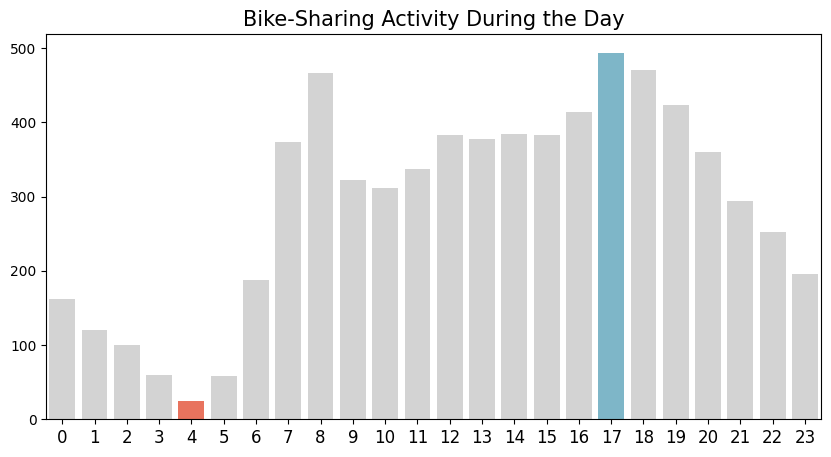

In [104]:
hour_df = main_df.groupby(by="hr").cnt.nunique().reset_index()
hour_df.rename(columns={
    "cnt": "count",
    "hr": "hour"
}, inplace=True)

max_count_index = hour_df['count'].idxmax()
min_count_index = hour_df['count'].idxmin()

colors = [
    '#72BCD4' if i == max_count_index else
    '#FF6347' if i == min_count_index else
    '#D3D3D3'
    for i in range(len(hour_df))
]

plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="count", 
    x="hour",
    data=hour_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Bike-Sharing Activity During the Day", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Bagaimana musim dan cuaca mempengaruhi aktivitas bike-sharing?

In [105]:
season_name = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

main_df['season'] = main_df['season'].map(season_name)

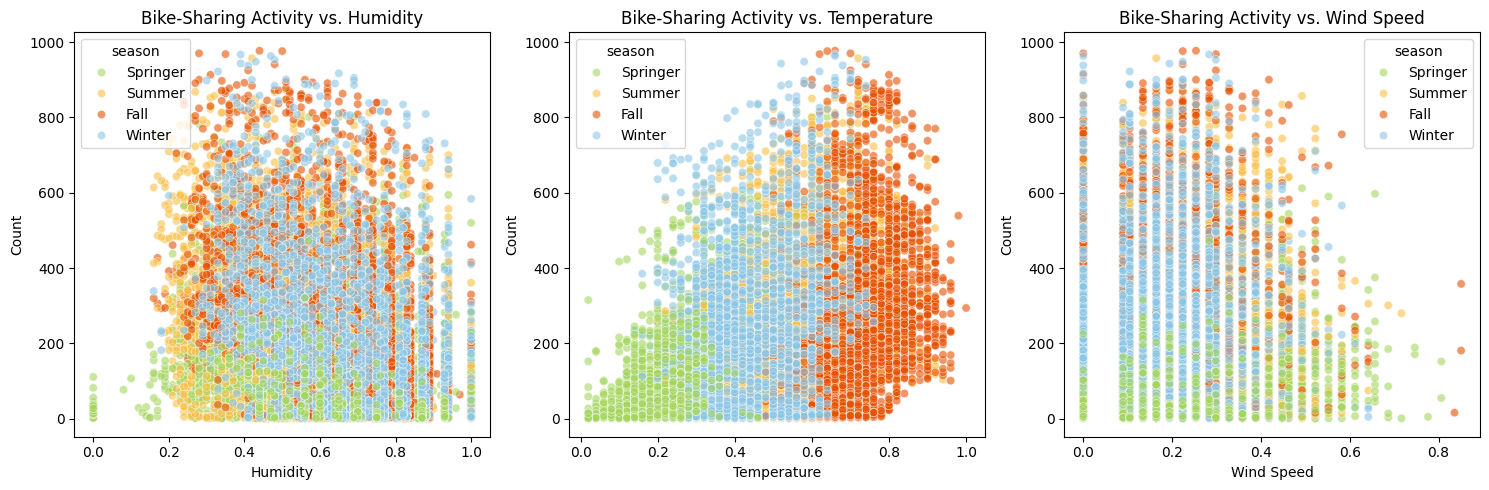

In [106]:
season_colors = {
    'Springer': '#A4D65E',  
    'Summer': '#FBBE43',  
    'Fall': '#E65100',    
    'Winter': '#8BC6E6'    
}

# Scatter plot for bike-sharing activity against humidity, grouped by season
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='hum', y='cnt', hue='season', data=main_df, alpha=0.6, palette=season_colors)
plt.title('Bike-Sharing Activity vs. Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')

# Scatter plot for bike-sharing activity against temperature
plt.subplot(1, 3, 2)
sns.scatterplot(x='temp', y='cnt', hue='season', data=main_df, alpha=0.6, palette=season_colors)
plt.title('Bike-Sharing Activity vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')

# Scatter plot for bike-sharing activity against wind speed
plt.subplot(1, 3, 3)
sns.scatterplot(x='windspeed', y='cnt', hue='season', data=main_df, alpha=0.6, palette=season_colors)
plt.title('Bike-Sharing Activity vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

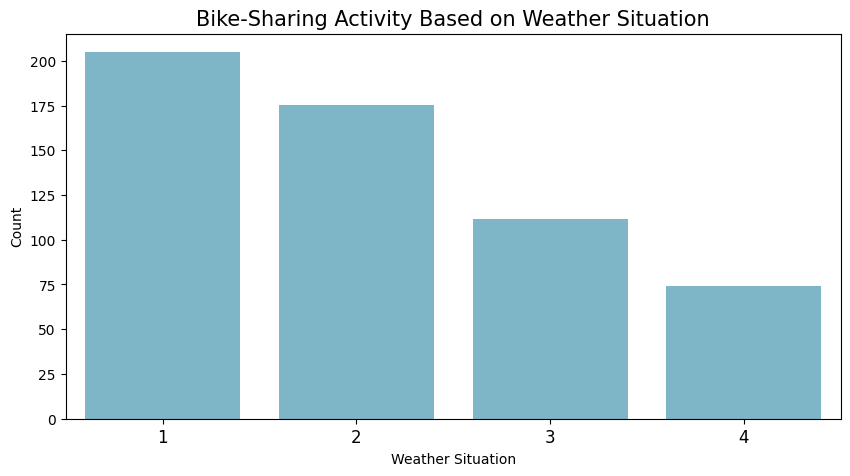

In [107]:
plt.figure(figsize=(10, 5))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"] 
sns.barplot(
    y="cnt", 
    x="weathersit",
    data=main_df.sort_values(by="cnt", ascending=False),
    palette=colors,
    hue="weathersit",
    legend=False,
    errorbar=None 
)
plt.title("Bike-Sharing Activity Based on Weather Situation", loc="center", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Weather Situation")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 3: Bagaimana perbedaan aktivitas bike-sharing casual dan registered user dalam seminggu?

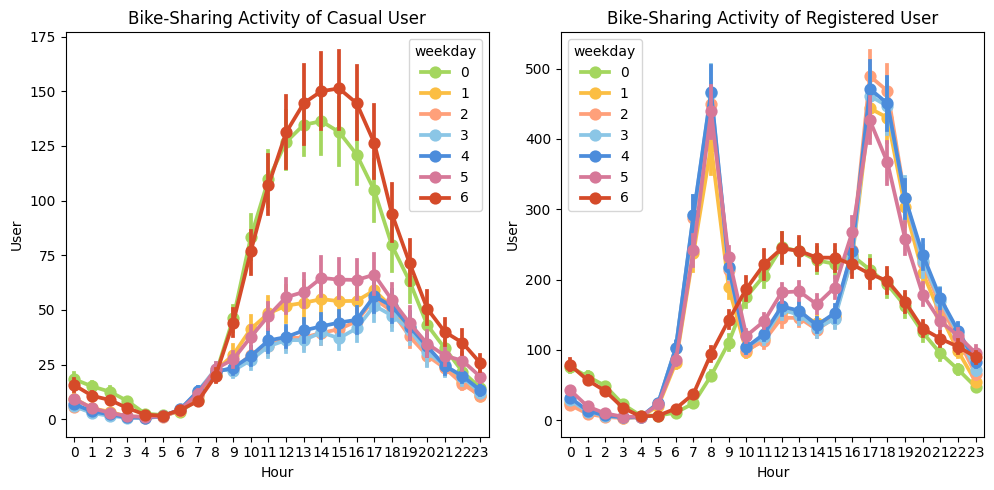

In [108]:
colors = [
    '#A4D65E',  
    '#FBBE43',  
    '#FFA07A',  
    '#8BC6E6',  
    '#4C8CDB',  
    '#D67898',  
    '#D54A29'   
]
# Line chart for bike-sharing activity of casual user in a week
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.pointplot(x='hr', y='casual', hue='weekday', data=main_df, palette=colors)
plt.title('Bike-Sharing Activity of Casual User')
plt.xlabel('Hour')
plt.ylabel('User')

# Line chart for bike-sharing activity of registered user in a week
plt.subplot(1, 3, 2)
sns.pointplot(x='hr', y='registered', hue='weekday', data=main_df, palette=colors)
plt.title('Bike-Sharing Activity of Registered User')
plt.xlabel('Hour')
plt.ylabel('User')

plt.tight_layout()
plt.show()

**Insight:**
- Bike-sharing activity is the highest at 17.00 and second highest at 8.00. The activity is the lowest at 04.00. 
- The bike sharing activity increased when the humidity is around 0.2 - 0.6 which is mostly occur in Fall, Summer, and Winter season. The activity also increased when the temperature is around 0.6 - 0.8 on Summer or Fall. The bike sharing activity is thriving when the wind speed is low in Winter, Summer, or Fall. Overall bike-sharing activity is lowest in Spring.
- The bike sharing activity is the highest when the weather are Clear, Few clouds, Partly cloudy, Partly cloudy and the lowest when the weather are Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Casual user of bike-sharing mostly active in the weekends (Saturday and Sunday) in the time range 12.00 - 17.00, but registered user of bike-sharing mostly active in the weekday (Monday - Friday) in the time range 7.00 - 9.00 and in the time range 17.00 - 20.00. 


## Analisis Lanjutan (Clustering)

Implementing clustering on the data to group the bike-sharing activities based on:
- Casual Users and Registered Users
- Temperature, Humidity, and Windspeed 

In [109]:
# Clustering Casual Users
casual_bins = [0, 4, 48, 400]  
casual_labels = ['Low', 'Medium', 'High']
main_df['casual_user'] = pd.cut(main_df['casual'], bins=casual_bins, labels=casual_labels, include_lowest=True)

# Clustering Registered Users
registered_bins = [0, 34, 220, 900]  
registered_labels = ['Low', 'Medium', 'High']
main_df['registered_user'] = pd.cut(main_df['registered'], bins=registered_bins, labels=registered_labels, include_lowest=True)


In [110]:
# Clustering Temperature
temp_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Adjust these values based on your data range
temp_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
main_df['temp_category'] = pd.cut(main_df['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

# Clustering Humidity
humidity_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Adjust these values based on your data range
humidity_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
main_df['humidity_category'] = pd.cut(main_df['hum'], bins=humidity_bins, labels=humidity_labels, include_lowest=True)

# Clustering Windspeed
windspeed_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  # Adjust these values based on your data range
windspeed_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
main_df['windspeed_category'] = pd.cut(main_df['windspeed'], bins=windspeed_bins, labels=windspeed_labels, include_lowest=True)


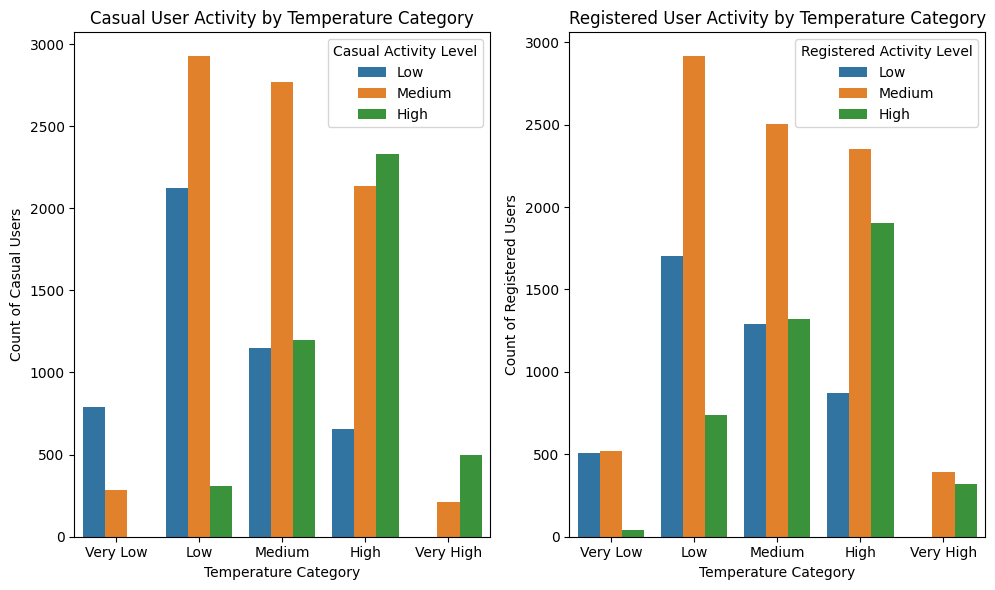

In [111]:
plt.figure(figsize=(15, 6))

#Casual user
plt.subplot(1, 3, 1)
sns.countplot(data=main_df, x='temp_category', hue='casual_user')
plt.title('Casual User Activity by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Casual Users')
plt.legend(title='Casual Activity Level')

#Registered user
plt.subplot(1, 3, 2)
sns.countplot(data=main_df, x='temp_category', hue='registered_user')
plt.title('Registered User Activity by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Registered Users')
plt.legend(title='Registered Activity Level')

plt.tight_layout()
plt.show()

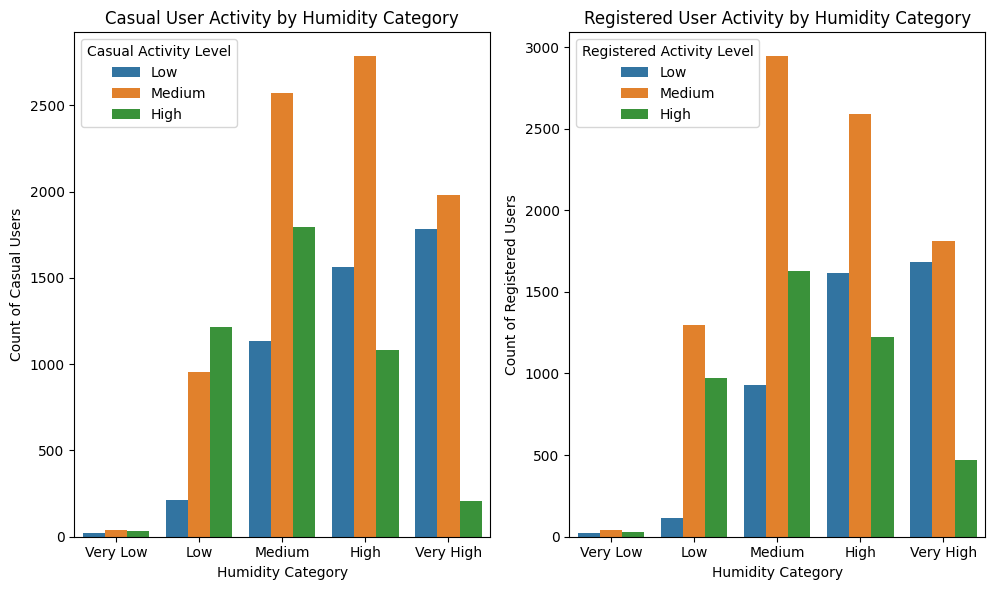

In [112]:
plt.figure(figsize=(15, 6))

#Casual user
plt.subplot(1, 3, 1)
sns.countplot(data=main_df, x='humidity_category', hue='casual_user')
plt.title('Casual User Activity by Humidity Category')
plt.xlabel('Humidity Category')
plt.ylabel('Count of Casual Users')
plt.legend(title='Casual Activity Level')

#Registered user
plt.subplot(1, 3, 2)
sns.countplot(data=main_df, x='humidity_category', hue='registered_user')
plt.title('Registered User Activity by Humidity Category')
plt.xlabel('Humidity Category')
plt.ylabel('Count of Registered Users')
plt.legend(title='Registered Activity Level')

plt.tight_layout()
plt.show()

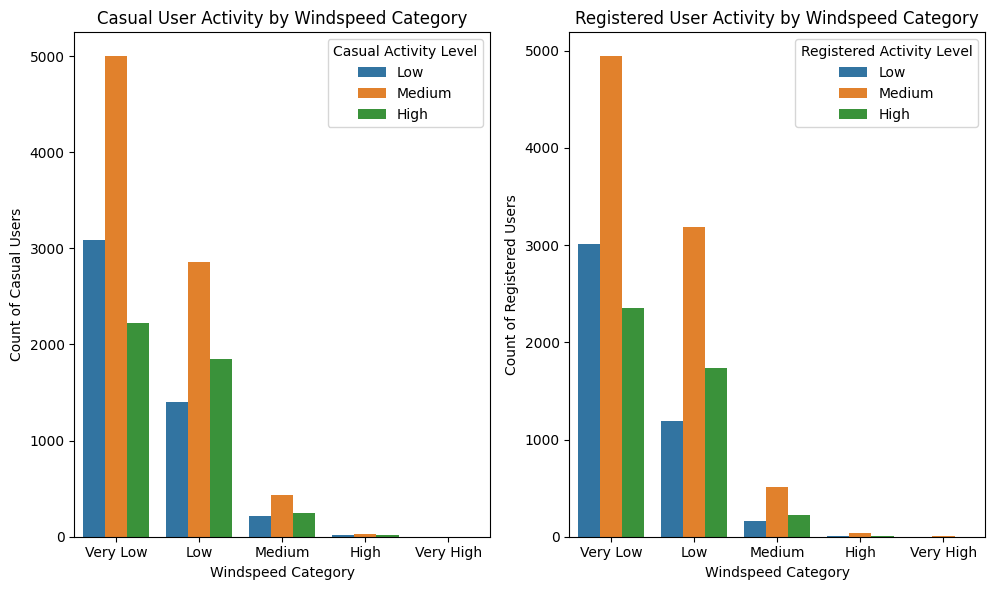

In [113]:
plt.figure(figsize=(15, 6))

#Casual user
plt.subplot(1, 3, 1)
sns.countplot(data=main_df, x='windspeed_category', hue='casual_user')
plt.title('Casual User Activity by Windspeed Category')
plt.xlabel('Windspeed Category')
plt.ylabel('Count of Casual Users')
plt.legend(title='Casual Activity Level')

#Registered user
plt.subplot(1, 3, 2)
sns.countplot(data=main_df, x='windspeed_category', hue='registered_user')
plt.title('Registered User Activity by Windspeed Category')
plt.xlabel('Windspeed Category')
plt.ylabel('Count of Registered Users')
plt.legend(title='Registered Activity Level')

plt.tight_layout()
plt.show()

In [114]:
directory = "dashboard"
main_df.to_csv(os.path.join(directory, "main_data.csv"), index=False)

## Conclusion

- In a day, bike-sharing activity is the highest in the morning and evening, and the lowest in the night. This shows the bike-sharing activity corresponds to rush hour in the day. Bike-sharing activity peaks in the rush hour and low in the night where most of the user stopped the activity.

- The bike-sharing activity increased when the humidity and temperature is medium. The bike sharing activity is thriving when the windspeed is the lowest. Overall bike-sharing activity is lowest in Spring.

- The bike-sharing activity is the highest in Clear, Few clouds, Partly cloudy, Partly cloudy weather, instead it's the lowest in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather.

- Casual user of bike-sharing mostly active in the weekends (Saturday and Sunday) in the afternoon, but registered user of bike-sharing mostly active in the weekday (Monday - Friday) in the morning and evening. It correspond to the amount of bike-sharing activity is higher in working day instead of holiday.